Step 1: Importing necessary libraries. However, we shall import remaining libraries once we open the required dataset and the needed alogorithms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Step 2: This is an classification dataset ie Binary classification. Output column being 'target'. Therefore, we shall import classifications algorithm.

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import graphviz

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, precision_score, recall_score

Step 3: Exploratory Data Analysis

In [4]:
df.isna().sum() # No null values. That's great. We don't have to perform any cleansing techniques.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Step 4: Visualizing the dataset

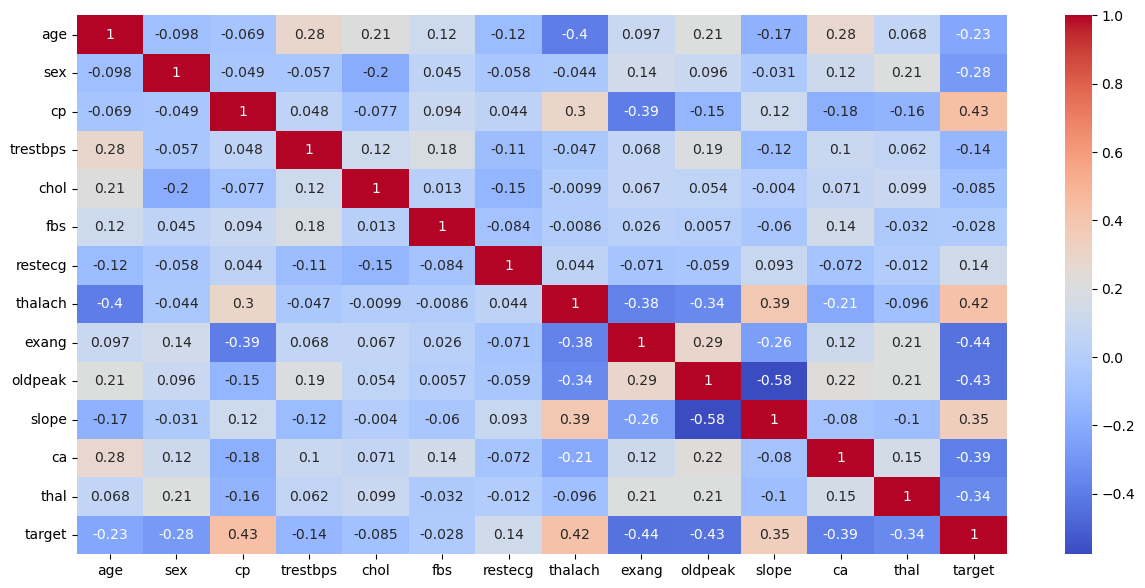

In [8]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

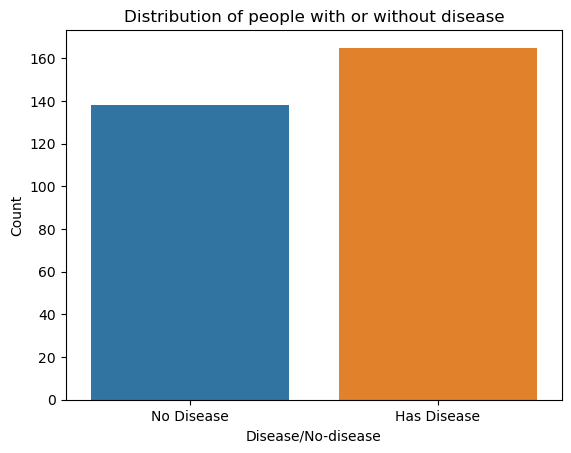

In [9]:
sns.countplot(x=df['target'])
plt.xticks(range(2),['No Disease', 'Has Disease'])
plt.xlabel('Disease/No-disease')
plt.ylabel('Count')
plt.title('Distribution of people with or without disease')
plt.show()

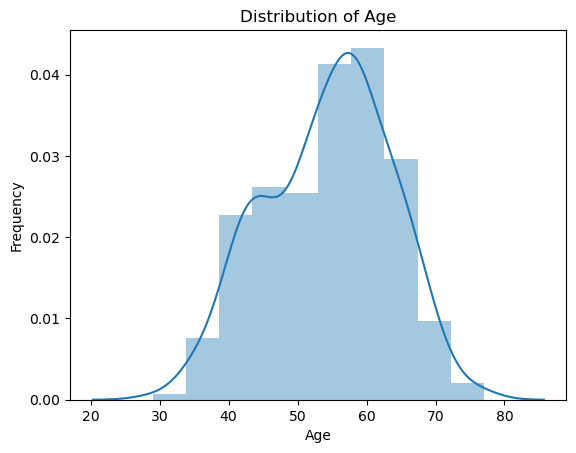

In [10]:
sns.distplot(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

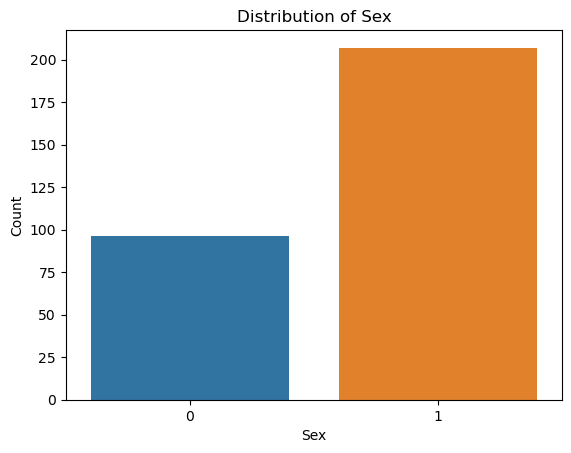

In [11]:
sns.countplot(x='sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

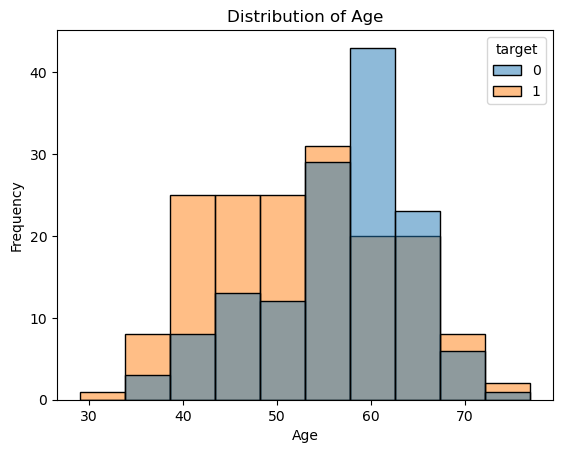

In [12]:
sns.histplot(data=df, x='age', hue='target', bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

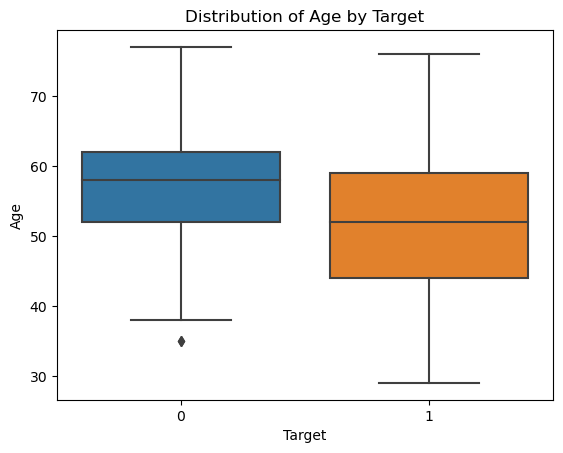

In [13]:
sns.boxplot(x='target', y='age', data=df)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Distribution of Age by Target')
plt.show()

Step 5: Our model is ready to be trained. 

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=42, stratify=y)

In [16]:
ss = StandardScaler()

In [17]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## Cross Validation Scores of the models

In [18]:
models = [
        ["LogisticRegression", LogisticRegression()],
        ["DecisionTreeClassifier",DecisionTreeClassifier()],
        ['RandomForestClassifier',RandomForestClassifier()]
]

results = []

for name, model in models:
    rfe = RFE(estimator=model)
    x_train_selected = rfe.fit_transform(x_train,y_train)

    acc = cross_val_score(model,x_train_selected,y_train,
                          cv = RepeatedKFold(n_repeats=2,n_splits=2,random_state=42), # type: ignore
                          n_jobs=-1)
    
    precision = cross_val_score(model, x_train_selected, y_train, 
                                cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=42),# type: ignore
                                n_jobs=-1, scoring="precision")

    recall = cross_val_score(model, x_train_selected, y_train, 
                             cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=42),# type: ignore
                             n_jobs=-1, scoring="recall")
    
    f1 = cross_val_score(model, x_train_selected, y_train, 
                         cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=42),# type: ignore
                         n_jobs=-1, scoring="f1")
    
    roc_auc = cross_val_score(model, x_train_selected, y_train, 
                              cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=42),# type: ignore
                              n_jobs=-1, scoring="roc_auc")

    results.append([name, round(acc.mean(), 2), round(precision.mean(), 2), round(recall.mean(), 2), round(f1.mean(), 2), round(roc_auc.mean(), 2)])
    
final_results = pd.DataFrame(results, columns=["Model", "Accuracy","Precision","Recall","F1 Score","ROC AUC"]).sort_values(by="Accuracy", ascending=False)
final_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,LogisticRegression,0.85,0.84,0.89,0.86,0.91
2,RandomForestClassifier,0.79,0.77,0.82,0.81,0.87
1,DecisionTreeClassifier,0.73,0.77,0.72,0.74,0.72


## Predicting

In [19]:
models = [
    ["LogisticRegression", LogisticRegression()],
    ["DecisionTreeClassifier", DecisionTreeClassifier()],
    ["RandomForestClassifier", RandomForestClassifier()]
]

results = []

for i, (name, model) in enumerate(models):
    rfe = RFE(estimator=model)
    x_train_selected = rfe.fit_transform(x_train, y_train)
    x_test_selected = rfe.transform(x_test)

    # Get the selected feature indices
    selected_feature_indices = [idx for idx, is_selected in enumerate(rfe.support_) if is_selected]

    model.fit(x_train_selected, y_train)
    y_pred = model.predict(x_test_selected)

    results.append([name, round(accuracy_score(y_test, y_pred), 2), 
                    round(precision_score(y_test, y_pred), 2),
                    round(recall_score(y_test, y_pred), 2)])

In [21]:
final_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall"]).sort_values(by="Accuracy", ascending=False)
final_results

,Model,Accuracy,Precision,Recall
0,LogisticRegression,0.77,0.77,0.82
2,RandomForestClassifier,0.75,0.75,0.82
1,DecisionTreeClassifier,0.68,0.70,0.74


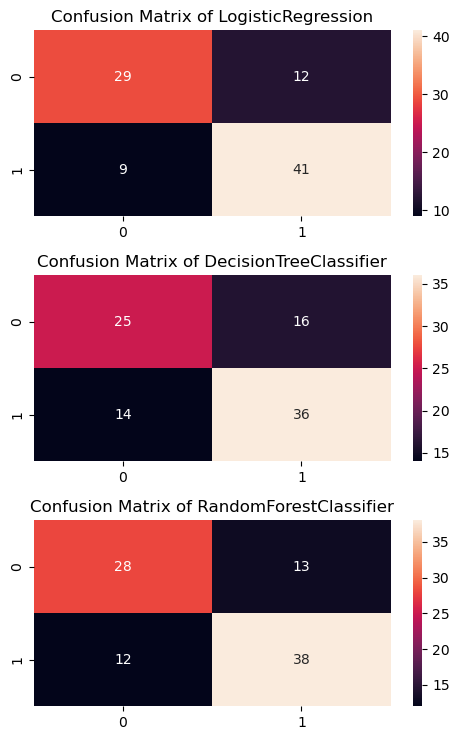

In [22]:
models = [
    ["LogisticRegression", LogisticRegression()],
    ["DecisionTreeClassifier", DecisionTreeClassifier()],
    ["RandomForestClassifier", RandomForestClassifier()]
]

fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(5, 2.5 * len(models)))

for i, (name, model) in enumerate(models):
    rfe = RFE(estimator=model)
    x_train_selected = rfe.fit_transform(x_train, y_train)
    x_test_selected = rfe.transform(x_test)

    model.fit(x_train_selected, y_train)
    y_pred = model.predict(x_test_selected)

    ax = axes[i]
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, fmt="d")
    ax.set_title(f'Confusion Matrix of {name}',fontsize=12)
    
plt.tight_layout()
plt.show()

In [23]:
models = [
    ["LogisticRegression", LogisticRegression()],
    ["DecisionTreeClassifier", DecisionTreeClassifier()],
    ["RandomForestClassifier", RandomForestClassifier()]
]

for i, (name, model) in enumerate(models):
    rfe = RFE(estimator=model)
    x_train_selected = rfe.fit_transform(x_train, y_train)
    x_test_selected = rfe.transform(x_test)

    model.fit(x_train_selected, y_train)
    y_pred = model.predict(x_test_selected)

    print(f'Classification report of {name}:')
    print(classification_report(y_test, y_pred))

Classification report of LogisticRegression:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91

Classification report of DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60        41
           1       0.67      0.70      0.69        50

    accuracy                           0.65        91
   macro avg       0.64      0.64      0.64        91
weighted avg       0.65      0.65      0.65        91

Classification report of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68        41
           1       0.73      0.76      0.75        50

    accuracy                           

# Conclusion:
        Logistics regression is performing much better than Decision Tree and Random forest.

# GraphViz For Decision Tree

In [35]:
Selected_Features = [2, 4, 7, 9, 11, 12]
selected_columns = df.columns[Selected_Features]
feature_names = selected_columns.tolist()
print(feature_names)

['cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


In [27]:
target_names = ['1','0']

In [28]:
clf = DecisionTreeClassifier()
clf.fit(x_train_selected, y_train)

dot_data = export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("DecisionTree_Visual") 

'DecisionTree_Visual.pdf'

# GraphViz For Random Forest

In [34]:
Selected_Features = [0, 2, 4, 7, 9, 12]
selected_columns = df.columns[Selected_Features]
feature_names = selected_columns.tolist()
print(feature_names)

['age', 'cp', 'chol', 'thalach', 'oldpeak', 'thal']


In [30]:
clf = RandomForestClassifier()
clf.fit(x_train_selected, y_train)

tree_to_visualize = clf.estimators_[0]

dot_data = export_graphviz(
    tree_to_visualize, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("RandomForest_Visual")

'RandomForest_Visual.pdf'

The above code for prediction, confusion matrix & classification report have been broken down into 3 parts. Here is the entire code with all 3 in one.

In [31]:
# models = [
#     ["LogisticRegression", LogisticRegression()],
#     ["DecisionTreeClassifier", DecisionTreeClassifier()],
#     ["RandomForestClassifier", RandomForestClassifier()]
# ]

# results = []

# fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(5, 2.5 * len(models)))

# for i, (name, model) in enumerate(models):
#     rfe = RFE(estimator=model)
#     x_train_selected = rfe.fit_transform(x_train, y_train)
#     x_test_selected = rfe.transform(x_test)
    
#     selected_feature_indices = [idx for idx, is_selected in enumerate(rfe.support_) if is_selected]

#     model.fit(x_train_selected, y_train)
#     y_pred = model.predict(x_test_selected)

#     ax = axes[i]
#     sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, fmt="d")
#     ax.set_title(f'Confusion Matrix of {name}', fontsize=12)

#     results.append([name, round(accuracy_score(y_test, y_pred), 2), 
#                     round(precision_score(y_test, y_pred), 2),
#                     round(recall_score(y_test, y_pred), 2)])

#     print(f'Classification report of {name}:')
#     print(classification_report(y_test, y_pred))

# plt.tight_layout()

In [32]:
# final_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall"]).sort_values(by="Accuracy", ascending=False)
# final_results